In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [5]:
import visual_genome.local as vg

VG_DATA_PATH = './data/visual-genome'

# load vg image info and region description
all_image_data = vg.get_all_image_data(data_dir=VG_DATA_PATH)
all_region_descriptions = vg.get_all_region_descriptions(data_dir=VG_DATA_PATH)

In [6]:
print('vg data size {}'.format(len(all_image_data)))
print('-----------------')
print('[all_image_data] type {}'.format(type(all_image_data[0])))
print('example')
print(all_image_data[0])
print('-----------------')
print('[all_region_descriptions] list of type {}'.format(type(all_region_descriptions[0][0])))
print('example')
print(all_region_descriptions[0])

vg data size 108077
-----------------
[all_image_data] type <class 'visual_genome.models.Image'>
example
id: 1, coco_id: -1, flickr_id: -1, width: 800, url: https://cs.stanford.edu/people/rak248/VG_100K_2/1.jpg
-----------------
[all_region_descriptions] list of type <class 'visual_genome.models.Region'>
example
[id: 1382, x: 421, y: 57, width: 82,height: 139, phrase: the clock is green in colour, image: 1, id: 1383, x: 194, y: 372, width: 182,height: 109, phrase: shade is along the street , image: 1, id: 1384, x: 241, y: 491, width: 61,height: 30, phrase: man is wearing sneakers, image: 1, id: 1385, x: 617, y: 377, width: 36,height: 36, phrase: cars headlights are off, image: 1, id: 1386, x: 322, y: 298, width: 41,height: 49, phrase: bikes are parked at the far edge, image: 1, id: 1432, x: 122, y: 14, width: 84,height: 178, phrase: A sign on the facade of the building, image: 1, id: 1433, x: 624, y: 236, width: 96,height: 332, phrase: A tree trunk on the sidewalk, image: 1, id: 1434, 

### Visualizing ground truth regions

In [7]:
import os
import re

def vg_url_to_file_path(vg_data_path, url):
    
    res = re.search('(VG.*)/(.*.jpg)$', url)
    return os.path.join(vg_data_path, res.group(1), res.group(2))

In [8]:
vg_url_to_file_path(VG_DATA_PATH, all_image_data[2].url)

'./data/visual-genome/VG_100K/3.jpg'

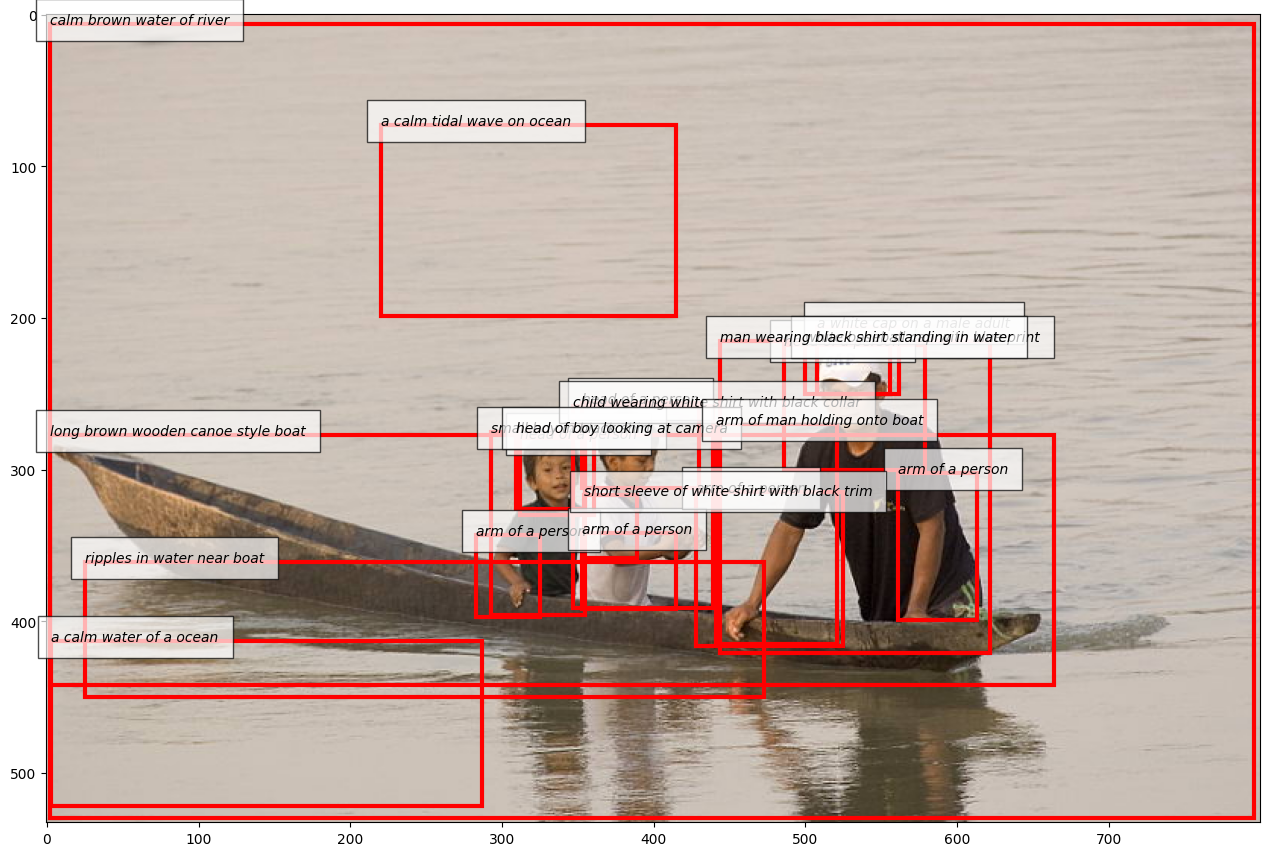

In [9]:
# Ref: https://github.com/ranjaykrishna/visual_genome_python_driver/blob/master/region_visualization_demo.ipynb

import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.patches import Rectangle

def visualize_regions(image_file_path, regions):
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)

    img = Image.open(image_file_path)
    plt.imshow(img)
    ax = plt.gca()
    for region in regions:
        ax.add_patch(Rectangle((region.x, region.y),
                               region.width,
                               region.height,
                               fill=False,
                               edgecolor='red',
                               linewidth=3))
        ax.text(region.x, region.y, region.phrase, style='italic', bbox={'facecolor':'white', 'alpha':0.7, 'pad':10})
    fig = plt.gcf()
    plt.tick_params(labelbottom='off', labelleft='off')
    plt.show()

IMG_NAME = 51
img_idx = IMG_NAME - 1

image_file_path = vg_url_to_file_path(VG_DATA_PATH, all_image_data[img_idx].url)
regions = all_region_descriptions[img_idx]

visualize_regions(image_file_path, regions[:20])

### Visualizing regions

In [11]:
! python describe.py --help

usage: describe.py [-h] [--config_json CONFIG_JSON] [--lut_path LUT_PATH]
                   [--model_checkpoint MODEL_CHECKPOINT] [--img_path IMG_PATH]
                   [--result_dir RESULT_DIR] [--box_per_img BOX_PER_IMG]
                   [--batch_size BATCH_SIZE] [--extract] [--cpu] [--verbose]
                   [--check]

Do dense captioning

optional arguments:
  -h, --help            show this help message and exit
  --config_json CONFIG_JSON
                        path of the json file which stored model configuration
  --lut_path LUT_PATH   look up table path
  --model_checkpoint MODEL_CHECKPOINT
                        path of the trained model checkpoint
  --img_path IMG_PATH   path of images, should be a file or a directory with
                        only images
  --result_dir RESULT_DIR
                        path of the directory to save the output file
  --box_per_img BOX_PER_IMG
                        max boxes to describe per image
  --batch_size BATCH_SIZE
  

In [2]:
# 使用脚本
! python describe.py --config_json './model_params/train_all_val_all_bz_2_epoch_10_inject_init/config.json' \
  --model_checkpoint './model_params/train_all_val_all_bz_2_epoch_10_inject_init_end.pth.tar' \
  --img_path '/Users/vatsal/Downloads/densecap-pytorch-main/apple.jpg' \
  --result_dir '.' \
  --batch_size 2 --verbose

Traceback (most recent call last):
  File "/Users/vatsal/Desktop/CRYSTAL MARK II/CircumSpect/describe.py", line 13, in <module>
    from CircumSpect.model.densecap import densecap_resnet50_fpn
ModuleNotFoundError: No module named 'CircumSpect'


In [2]:
import json

RESULT_JSON_PATH = './result.json'
with open(RESULT_JSON_PATH, 'r') as f:
    results = json.load(f)

for file_path in results.keys():
    print(file_path)

/Users/vatsal/Downloads/photo-1514894884401-c4be521f04ef.jpeg


In [3]:
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.patches import Rectangle
import cv2

def visualize_result(image_file_path, result):
    assert isinstance(result, list)

    img = cv2.imread(image_file_path)

    captions = []

    for r in result:
        box = r['box']
        cv2.rectangle(img, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), (0, 0, 255), 1)
        cv2.rectangle(img, (int(box[0]), int(box[1])), (int(box[2]), int(box[1])-50), (0, 0, 255), 1)
        cv2.putText(img, r['cap'], (int(box[0]), int(box[1]) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
        captions.append(r['cap'])

    cv2.imshow("output.png", img)
    cv2.waitKey(1)
    return captions


In [4]:
IMG_FILE_PATH = '/Users/vatsal/Downloads/photo-1514894884401-c4be521f04ef.jpeg'
TO_K = 15

assert IMG_FILE_PATH in results.keys()

print(visualize_result(IMG_FILE_PATH, results[IMG_FILE_PATH][:TO_K]))

['the red apple is the color blue', 'a red and white flower', 'a hand holding a doughnut', 'a tree with lots of leaves', 'a hole of a flower', 'the leaf is green', 'a bird with a black beak', 'a hole of a flower', 'a red and green flower', 'a bunch of green bananas', 'red light on the side of the building', 'the orange is orange', 'a red flower beds', 'red and white stop sign', 'a man wearing a red shirt']


: 